In [22]:
import numpy as np
import os
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import shutil
import cv2

In [18]:
dataset_path = "./dataset"
if not os.path.exists(dataset_path):
    os.mkdir(dataset_path)

def make_folder(root, name):
    root_path = os.path.join(root,name)
    if not os.path.exists(root_path):
        os.mkdir(root_path)
    input_path = os.path.join(root_path, "input")
    if not os.path.exists(input_path):
        os.mkdir(input_path)
    label_path = os.path.join(root_path, "label")
    if not os.path.exists(label_path):
        os.mkdir(label_path)

    return input_path,label_path

train_input_path, train_label_path = make_folder(dataset_path,"train")
test_input_path, test_label_path = make_folder(dataset_path,"test")

print(train_input_path, train_label_path)
print(test_input_path, test_label_path)

./dataset\train\input ./dataset\train\label
./dataset\test\input ./dataset\test\label


In [78]:
def add_noise(img_np, mean = 0, scale = 0.2, random = False):
    row,col,ch_n = img_np.shape
    img_np = (img_np - img_np.min())/(img_np.max()- img_np.min())
    if random:
        gaussian = np.random.normal(mean, np.random.uniform(low=0, high=0.8), size= (row,col,1))
        #print(np.random.uniform(low=0, high=1))
    else:
        gaussian = np.random.normal(mean, scale, size= (row,col,1))
    noise = np.concatenate([gaussian,gaussian,gaussian], axis=2)
    #print(noise.shape, img_np.shape)
    noise_img_np = img_np + noise
    noise_img_np = (noise_img_np - noise_img_np.min())/(noise_img_np.max()- noise_img_np.min()) * 255
    noise_img = Image.fromarray(noise_img_np.astype(np.uint8))
    return noise_img,noise_img_np

In [63]:
test_path = "./test"
for test_folder_name in tqdm(os.listdir(test_path),position=0,leave=True):
    extract_folder = os.path.join(test_path,test_folder_name,test_folder_name)
    for img_names in tqdm(os.listdir(extract_folder),position=0,leave=True):
        source_img_path = os.path.join(extract_folder, img_names)
        label_img = Image.open(source_img_path) # read it to [0,255]
        label_np = np.asarray(label_img)

        input_img, input_np = add_noise(label_np)

        # Names
        target_names = test_folder_name+"_"+img_names
        # Copy the file to label
        target_label_path = os.path.join(test_label_path, target_names)
        shutil.copyfile(source_img_path,target_label_path)
        # Copy the file to input
        target_input_names = os.path.join(test_input_path, target_names)
        input_img.save(target_input_names)
        # print(source_img_path, "  ", test_label_path, " ", target_input_names)
    #     break
    # break

100%|██████████| 4/4 [01:58<00:00, 29.74s/it]


In [79]:
test_path = "./train"
for test_folder_name in tqdm(os.listdir(test_path),position=0,leave=True):
    extract_folder = os.path.join(test_path,test_folder_name,"X3")
    # print(extract_folder)
    for img_names in tqdm(os.listdir(extract_folder),position=0,leave=True):
        source_img_path = os.path.join(extract_folder, img_names)
        label_img = Image.open(source_img_path) # read it to [0,255]
        label_np = np.asarray(label_img)

        input_img, input_np = add_noise(label_np, random = True)

        # Names
        target_names = test_folder_name+"_"+img_names
        # Copy the file to label
        target_label_path = os.path.join(train_label_path, target_names)
        shutil.copyfile(source_img_path,target_label_path)
        # Copy the file to input
        target_input_names = os.path.join(train_input_path, target_names)
        input_img.save(target_input_names)
        # print(source_img_path, "  ", test_label_path, " ", target_input_names)
    #     break
    # break


100%|██████████| 2/2 [10:46<00:00, 323.46s/it]


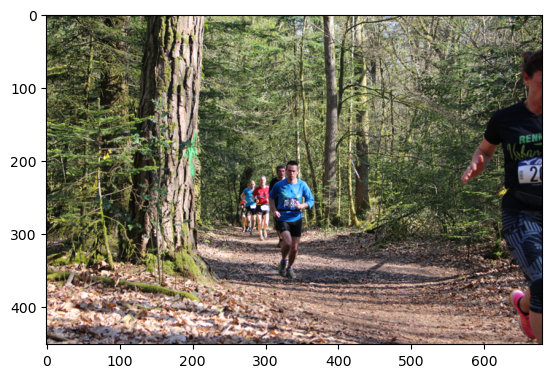

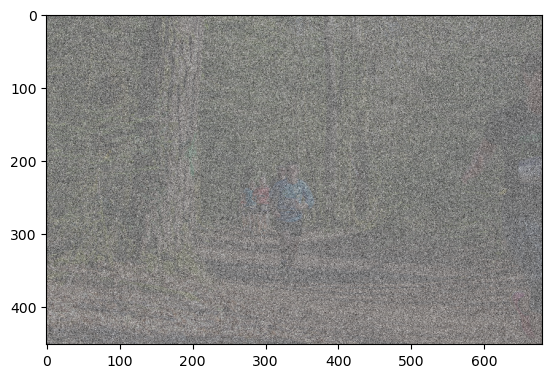

In [74]:
label_np.min(), label_np.max()
plt.figure()
plt.imshow(label_img)
plt.show()

noise_img, noise_img_np = add_noise(label_np,mean=0.5, scale=0.8)
#noise_img.save("test.png")
plt.figure()
plt.imshow(noise_img)
plt.show()

In [7]:
os.listdir(test_path)

['BSDS100', 'BSDS200', 'General100', 'urban100']